# Project: Analysis of WeRateDogs Tweets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#packages">Import of Packages</a></li>
<li><a href="#gather">Gather Data</a></li>
<li><a href="#asses">Asses Data</a></li>
<li><a href="#clean">Clean Data</a></li>
<li><a href="#analysis">Data Analysis</a></li>
<li><a href="#conc">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The goal of this analysis is to identify factors that can help to predict whether patients show up to their appointments or not. Basis for the analysis is a data set provided by __[kaggle](https://www.kaggle.com/joniarroba/noshowappointments)__ which collects collects

## Import of requiered Packages

In [15]:
import pandas as pd
import numpy as np
import datetime
import requests
import os
import tweepy
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='gather'></a>
## Gather Data

### Tweet Archive

In [16]:
# Read Twitter Archive from provided csv file
archive = pd.read_csv('./Twitter_Files/twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tweet Image Prediction

In [18]:
# Download Tweet Image Predictions file from udacity server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save file on local drive
with open (os.path.join('Twitter_Files', url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

# Read file into data frame
image = pd.read_csv('./Twitter_Files/image-predictions.tsv', sep='\t') # set \t as seperator, since it is a .tsv file
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


### Tweet Retweet Count

In [20]:
'''
Since tweet information is already stored in tweet_json.txt file, do not request data from api again

# Store Twitter authentication details
# https://developer.twitter.com/en/account/get-started --> Apps --> BS_Udacity_Dogs
my_api_key = 'V4mljUBU6tUgbzXo8XORLQAgj'
my_api_secret_key = 'uVb3YtSQLJwSakJelPOJ8JWzC4zdP2CHlrhyIyow8oAAQXoBF7'
my_access_token = '1095995458781106176-ClvYF8zgxLd18YK5lN1c0rrc0MXbXh'
my_access_token_secret = 'jwhfSN2VIDgk3mim61Bvc7YKQ1YzhHKpcDMfZ86DYdlwi'

# Twitter API connection
auth = tweepy.OAuthHandler(my_api_key, my_api_secret_key)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

# Get information from Twitter API for each tweet_id in Twitter Archive file
tweet_ids = archive['tweet_id']
with open('./Twitter_Files/tweet_json.txt', mode = 'w') as tweet_json:
    for tweet_id in tweet_ids:
        try:
            status = api.get_status(tweet_id) #, tweet_mode='extended'
            json_str = json.dumps(status._json) # convert to JSON
            tweet_json.write(json_str + '\n') # write information to tweet_json.txt file
        except:
            # Tweet does not exist anymore 
             continue

'''

"\nSince tweet information is already stored in tweet_json.txt file, do not request data from api again\n\n# Store Twitter authentication details\n# https://developer.twitter.com/en/account/get-started --> Apps --> BS_Udacity_Dogs\nmy_api_key = 'V4mljUBU6tUgbzXo8XORLQAgj'\nmy_api_secret_key = 'uVb3YtSQLJwSakJelPOJ8JWzC4zdP2CHlrhyIyow8oAAQXoBF7'\nmy_access_token = '1095995458781106176-ClvYF8zgxLd18YK5lN1c0rrc0MXbXh'\nmy_access_token_secret = 'jwhfSN2VIDgk3mim61Bvc7YKQ1YzhHKpcDMfZ86DYdlwi'\n\n# Twitter API connection\nauth = tweepy.OAuthHandler(my_api_key, my_api_secret_key)\nauth.set_access_token(my_access_token, my_access_token_secret)\napi = tweepy.API(auth, wait_on_rate_limit = True)\n\n# Get information from Twitter API for each tweet_id in Twitter Archive file\ntweet_ids = archive['tweet_id']\nwith open('./Twitter_Files/tweet_json.txt', mode = 'w') as tweet_json:\n    for tweet_id in tweet_ids:\n        try:\n            status = api.get_status(tweet_id) #, tweet_mode='extended'\n 

In [21]:
# Read data from txt into a list (each line is one entry in list)
tweets_list = []
tweet_json = open('./Twitter_Files/tweet_json.txt', 'r')

for line in tweet_json:
    try:
        tweet = json.loads(line)
        tweets_list.append(tweet)
    except:
         continue
tweet_json.close()

# Extract 'retweet_count' and 'favorite_count' from list and store in dataframe (together with tweet_id)
favoretweet = pd.DataFrame() #create dataframe
favoretweet['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_list))
favoretweet['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_list))
favoretweet['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_list))

favoretweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


<a id='assess'></a>
## Assess Data

### Tweet Archive

In [22]:
# Get a basic idea of columns in table and their values
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,None,None,None,None
1808,676897532954456065,NaN,NaN,2015-12-15 22:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic handheld dog here. Appears unathletic. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676897532...,5,10,None,None,None,None,None
360,829861396166877184,NaN,NaN,2017-02-10 01:15:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She already knows she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829861396...,12,10,Mia,None,None,None,None


In [23]:
# Get data types of columns and number of non-null entries
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- Column **tweet_id** has data type integer (string is more suited for an ID)
- There a some columns with null values. However, all columns of interest have 2356 non-null values.
- Colummn **timestamp** should be converted to DateTime object to be better suited for analysis

In [24]:
#Get number of duplicated rows
sum(archive.duplicated())

0

In [25]:
# Check for duplicated values in 'tweet_id'
sum(archive.tweet_id.duplicated())   # could have also been analyzed by archive.tweet_id.nunique()  

0

There are no duplicated rows and only unique tweet_ids in this table.

In [26]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**rating_numerator** is supposed to be around/greater than 10. It ranges between 0 and 1776 and is further analyzed (e.g. for outliers. **rating_denominator** is supposed to be around 10. It ranges between 0 and 170 and is further analyzed (e.g. for outliers.

In [27]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
archive.query('rating_denominator!=10').count()[0]

23

23 rows out of 2356 have a denominator which is not 10 (less than 1% of all rows). These rows will be deleted to ease later analysis.

In [29]:
#create mask with denominators of 10, sicne all other rows will be removed later anyways
archive_10 = archive.query('rating_denominator==10') 
archive_10['rating_numerator'].value_counts().sort_index()

0         2
1         8
2         9
3        19
4        15
5        37
6        32
7        54
8       102
9       156
10      461
11      463
12      558
13      351
14       54
15        2
17        1
26        1
27        1
75        2
182       1
420       2
666       1
1776      1
Name: rating_numerator, dtype: int64

In [30]:
pd.set_option('display.max_colwidth', -1)
archive_10.query('rating_numerator>17').text

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                           
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                            
290     @markhoppus 182/10                                                                                                                                               
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back http

After checking some of the tweets with rating higher than 17, it seems that there are few float ratings where the decimal places are stored in column **rating_numerator** (9.75, 11.27 and 11.26). Those rows will be removed. Ratings greater than or equal to 182 are considered as outliers and will be removed as well (this applies to 5 ratings, two relating to Snoop Dogg and one to Atticus (dog of independence) with a rating of 1776).

In [31]:
# Check entries of name column
archive.name.value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Lucy         11 
Oliver       11 
Penny        10 
Lola         10 
Tucker       10 
Winston      9  
Bo           9  
the          8  
Sadie        8  
Daisy        7  
Toby         7  
Bailey       7  
Buddy        7  
an           7  
Stanley      6  
Koda         6  
Scout        6  
Jax          6  
Dave         6  
Leo          6  
Bella        6  
Jack         6  
Milo         6  
Rusty        6  
Oscar        6  
Gus          5  
            ..  
Tove         1  
Glacier      1  
Pip          1  
Zoe          1  
Cilantro     1  
Jennifur     1  
Olaf         1  
Teddy        1  
Socks        1  
Snoop        1  
Lenox        1  
Jeremy       1  
Zooey        1  
Todo         1  
Kanu         1  
Ember        1  
Steve        1  
Laika        1  
Eazy         1  
Obi          1  
Kane         1  
Finnegus     1  
Alexander    1  
Meatball     1  
Zara         1  
Bronte       1  
Edgar        1  
Glenn        1

There are some entries in **name** column which were not parsed correctly, e.g. 'a', 'an', 'such', 'quite'. Since all visibly identified erronous entries start with a lower case letter, this will be used to identify further erronous entries which will then be converted to 'None' in the Cleaning Process.

In [32]:
archive['Name_FirstLetter'] = archive['name'].str[0]
archive['Name_FirstLetter_Lower'] = archive['Name_FirstLetter'].str.islower()
archive_name_lower = archive.query('Name_FirstLetter_Lower==True')
archive_name_lower.name.value_counts()

a               55
the             8 
an              7 
very            5 
quite           4 
one             4 
just            4 
not             2 
mad             2 
actually        2 
getting         2 
this            1 
his             1 
old             1 
infuriating     1 
by              1 
light           1 
officially      1 
my              1 
space           1 
all             1 
life            1 
such            1 
incredibly      1 
unacceptable    1 
Name: name, dtype: int64

In [33]:
archive_name_none = archive_name_lower.name.value_counts().index.tolist()
archive_name_none

['a',
 'the',
 'an',
 'very',
 'quite',
 'one',
 'just',
 'not',
 'mad',
 'actually',
 'getting',
 'this',
 'his',
 'old',
 'infuriating',
 'by',
 'light',
 'officially',
 'my',
 'space',
 'all',
 'life',
 'such',
 'incredibly',
 'unacceptable']

In [34]:
# Check entries for columns **doggo, floofer, pupper, and puppo**
print(archive.pupper.value_counts())
print(archive.doggo.value_counts())
print(archive.puppo.value_counts())
print(archive.floofer.value_counts())
print("------------------------------------------")
print("Pupper: {}".format(archive.pupper.value_counts().loc['pupper']))
print("Doggo: {}".format(archive.doggo.value_counts().loc['doggo']))
print("Puppo: {}".format(archive.puppo.value_counts().loc['puppo']))
print("Floofer: {}".format(archive.floofer.value_counts().loc['floofer']))

None      2099
pupper    257 
Name: pupper, dtype: int64
None     2259
doggo    97  
Name: doggo, dtype: int64
None     2326
puppo    30  
Name: puppo, dtype: int64
None       2346
floofer    10  
Name: floofer, dtype: int64
------------------------------------------
Pupper: 257
Doggo: 97
Puppo: 30
Floofer: 10


Since out of the 2,356 available data records only 394 records have information on the type of dog this information will not be considered in the further analysis. If it were to be considered, one possible cleaning action would be to combine columns **doggo, floofer, pupper, and puppo** into one 'dogtype' column.

### Tweet Image Prediction

In [35]:
# Get a basic idea of columns in table and their values
image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1298,752334515931054080,https://pbs.twimg.com/ext_tw_video_thumb/752334354492362752/pu/img/uWISPc0YRmhUi9Ju.jpg,1,Bedlington_terrier,0.399163,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
1219,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,dalmatian,0.562315,True,Great_Dane,0.416478,True,German_short-haired_pointer,0.008552,True
1481,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,0.036469,False
617,680206703334408192,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,1,Christmas_stocking,0.149758,False,cloak,0.128830,False,teddy,0.109129,False


In [36]:
# Get data types of columns and number of non-null entries
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


- Column **tweet_id** has data type integer (string is more suited for an ID)
- The image prediction table has less entries than the Twitter archive table. Only a maximum of 2075 can be matched to 2356 tweets. No null values in this table.

In [37]:
#Get number of duplicated rows
sum(image.duplicated())

0

In [38]:
# Check for duplicated values in 'tweet_id'
sum(image.tweet_id.duplicated())   # could have also been analyzed by archive.tweet_id.nunique()  

0

There are no duplicated rows or tweet ids.

In [39]:
# Check the distribution on which image number corresponds to the most confident prediction
image.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

Most times the first image is the most confident prediction, but also p2, p3, and p4 have the best predictions. However information from p4 column is missing. Instead of deleting those rows from the data set the images with the average best fit are taken instead (lowest mean px_comf) (which is a bit simpler than identifying the second best fit for each row). 

In [40]:
image_p4 = image.query('img_num==4')
image_p4.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,3.100000e+01,31.0,31.000000,31.000000,31.000000
mean,8.002106e+17,4.0,0.818488,0.058523,0.027473
std,5.388178e+16,0.0,0.189390,0.053816,0.031909
min,6.686232e+17,4.0,0.226716,0.000023,0.000003
25%,7.606596e+17,4.0,0.771316,0.022395,0.007357
50%,8.186145e+17,4.0,0.883991,0.035059,0.017943
75%,8.339563e+17,4.0,0.944413,0.084091,0.029551
max,8.851676e+17,4.0,0.999953,0.204177,0.125745


If img_num is 4, p3 should be used instead (since it has lowest mean p3_conf value)

In [41]:
image.p2.value_counts().sort_index()

Afghan_hound                      5 
African_hunting_dog               1 
Airedale                          7 
American_Staffordshire_terrier    21
American_alligator                2 
American_black_bear               3 
Angora                            4 
Appenzeller                       3 
Arabian_camel                     4 
Arctic_fox                        4 
Australian_terrier                2 
Bedlington_terrier                5 
Bernese_mountain_dog              1 
Blenheim_spaniel                  4 
Border_collie                     12
Border_terrier                    4 
Boston_bull                       19
Brabancon_griffon                 10
Brittany_spaniel                  8 
Cardigan                          73
Chesapeake_Bay_retriever          41
Chihuahua                         44
Christmas_stocking                3 
Dandie_Dinmont                    4 
Doberman                          6 
English_foxhound                  2 
English_setter                    7 
E

When checking entries for p1, p2, and p3 it seems that real dog breeds are start with upper case letters whereas non dog breeds are start with lower case letters. This might be helpful later.

### Favorite/Retweet Count

In [42]:
# Get a basic idea of columns in table and their values
favoretweet.sample(5)

,tweet_id,favorite_count,retweet_count
888,758041019896193024,2843,402
1190,715696743237730304,4044,1355
1776,677269281705472000,2061,742
1279,707741517457260545,2596,645
397,823269594223824897,0,10639


In [43]:
# Get data types of columns and number of non-null entries
favoretweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


- Column **tweet_id** has data type integer (string is more suited for an ID)
- The favorite/retweet table has less entries than the Twitter archive table (some tweets might already have been deleted). Only a maximum of 2334 can be matched to 2356 tweets. No null values in this table.

In [44]:
#Get number of duplicated rows
sum(favoretweet.duplicated())

0

In [45]:
favoretweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.334000e+03,2334.000000,2334.000000
mean,7.420377e+17,7883.542845,2904.165381
std,6.815496e+16,12239.167992,4904.200484
min,6.660209e+17,0.000000,0.000000
25%,6.783361e+17,1366.500000,583.000000
50%,7.185770e+17,3439.500000,1355.500000
75%,7.986802e+17,9676.000000,3382.750000
max,8.918152e+17,163368.000000,83074.000000


No suspicious values (e.g. negative values) in this table. All vounts for favorite and retweet seem to be reasonable.

### Quality Issues
**Twitter Archive**
- Column **tweet_id** is not of type String
- Column **timestamp** is not of type DateTime object
- Some values in column **rating_denominator** are not 10 (23 rows)
- Ratings higher or equal to 26 are either dur to wrong formatting or are outlier ratings in column **rating_numerator** (9 rows)
- Erronous entries in **name** column (stored in array archive_name_none)
- Not all columns are relevant for later analysis

**Tweet Image Prediction**
- Column **tweet_id** is not of type String
- Some dog breeds might be stored with a lower case first letter
- Column names are not informative
- Not all columns are relevant for later analysis

**Tweet Retweet Count**
- Column **tweet_id** is not of type String

#### Tidiness Issues

- Most confident prediction for dog (and breed) is stored in multiple columns (**Tweet Image Prediction** columns **p1, p2, p3, p4**); for img_num is 4, p3 should be used instead.

<a id='clean'></a>
## Clean Data

In [46]:
# Make copies of data frames
archive_clean = archive.copy()
image_clean = image.copy()
favoretweet_clean = favoretweet.copy()

### Twitter Archive

#### Define
- Convert column **tweet_id** to String
- Convert column **timestamp** to type DateTime object

#### Code

In [47]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
Name_FirstLetter       

Conversion to String and DateTime object successful.

#### Define
- Drop rows where **rating_denominator** is not 10 (23 rows)

#### Code

In [49]:
archive_clean = archive_clean[archive_clean.rating_denominator==10]

#### Test

In [50]:
archive_clean.shape[0]

2333

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2333 non-null object
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2333 non-null datetime64[ns]
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2278 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          2333 non-null object
doggo                         2333 non-null object
floofer                       2333 non-null object
pupper                        2333 non-null object
puppo                         2333 non-null object
Name_FirstLetter       

Rows were deleted successfully (size before dropping was 2356, thus, 23 rows were dropped)

#### Define
- Keep only those rows where **rating_numerator** is lower than 26. Higher ratings are considered as wrong formatting or outliers (9 rows)

#### Code

In [52]:
archive_clean = archive_clean.query('rating_numerator<26')

#### Test

In [53]:
archive_clean.shape[0]

2324

Rows were deleted successfully (size before dropping was 2333, thus, 9 rows were dropped)

#### Define
- Create new column **dog_stage** for columns **doggo, floofer, pupper, and puppo**
note: melt function cannot be used since not all rows have defined dog stage and thus 'None' values cannot be removed afterwards (since those rows would then be removed as well)

#### Define
- Replcae erronous entries in **name** column with 'None' (stored in array archive_name_none)

#### Code

In [54]:
archive_clean.name.replace(archive_name_none, "None", inplace = True)

#### Test

In [55]:
print("{} 'None' in archive // {} 'None' in archive_clean".format(archive.name.value_counts().loc['None'], archive_clean.name.value_counts().loc['None']))

745 'None' in archive // 829 'None' in archive_clean


In [56]:
archive_name_lower.shape[0]

109

Count of "None" values for name was increased by 109, which is the number of entries in archive_name_lower (before 745, now 854)

### Tweet Image Prediction

#### Define
- Convert column **tweet_id** to String

#### Code

In [57]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

#### Test

In [58]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.0+ KB


#### Define
- Rename existing columns **px_dog** to 'isdog', **px** to'dogbreed', and **px_conf** to 'p_value' to store most confident prediction for dog and dog breed
- For img_num=1 use **p1**, for img_num=2 use **p2**, for img_num=3 use **p3**, and for img_num=4 use **p3**
- Capitalize dog breeds, since sometimes valid dog breeds are stored with lower case

#### Code

In [59]:
# Use p1_dog and p1 for img_num=1
image_clean_1 = image_clean
image_clean_1 = image_clean_1[image_clean_1.img_num==1]
image_clean_1 = image_clean_1.rename(columns = {'p1_dog':'isdog', 'p1':'dogbreed', 'p1_conf':'p_value'})

# Use p2_dog and p2 for img_num=2
image_clean_2 = image_clean
image_clean_2 = image_clean_2[image_clean_2.img_num==2]
image_clean_2 = image_clean_2.rename(columns = {'p2_dog':'isdog', 'p2':'dogbreed', 'p2_conf':'p_value'})

# Use p3_dog and p3 for img_num=3
image_clean_3 = image_clean
image_clean_3 = image_clean_3[image_clean_3.img_num==3]
image_clean_3 = image_clean_3.rename(columns = {'p3_dog':'isdog', 'p3':'dogbreed', 'p3_conf':'p_value'})

# Use p3_dog and p3 for img_num=4
image_clean_4 = image_clean
image_clean_4 = image_clean_4[image_clean_4.img_num==4]
image_clean_4 = image_clean_4.rename(columns = {'p3_dog':'isdog', 'p3':'dogbreed', 'p3_conf':'p_value'})

In [60]:
# Keept only columns 'tweetid, 'isdog', 'dogbreed', and 'p_value'
clean_1 = image_clean_1[['tweet_id','isdog','dogbreed','p_value']]
clean_2 = image_clean_2[['tweet_id','isdog','dogbreed','p_value']]
clean_3 = image_clean_3[['tweet_id','isdog','dogbreed','p_value']]
clean_4 = image_clean_4[['tweet_id','isdog','dogbreed','p_value']]

In [61]:
# Append data frames to one data frame
clean_1_2 = clean_1.append(clean_2, ignore_index=True)
clean_1_2_3 = clean_1_2.append(clean_3, ignore_index=True)
image_clean = clean_1_2_3.append(clean_4, ignore_index=True)

In [62]:
image_clean.dogbreed = image_clean.dogbreed.str.capitalize()

#### Test

In [63]:
image.shape[0]

2075

In [64]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id    2075 non-null object
isdog       2075 non-null bool
dogbreed    2075 non-null object
p_value     2075 non-null float64
dtypes: bool(1), float64(1), object(2)
memory usage: 50.7+ KB


In [65]:
image_clean.dogbreed.value_counts()

Golden_retriever             123
Labrador_retriever           109
Pembroke                     80 
Chihuahua                    76 
Pug                          53 
Chow                         39 
Samoyed                      39 
Pomeranian                   38 
Toy_poodle                   37 
Cocker_spaniel               31 
Malamute                     30 
French_bulldog               27 
Eskimo_dog                   26 
Chesapeake_bay_retriever     23 
Kuvasz                       22 
Shetland_sheepdog            21 
Cardigan                     21 
Staffordshire_bullterrier    21 
Siberian_husky               21 
Seat_belt                    21 
Beagle                       19 
Italian_greyhound            19 
Pekinese                     19 
Miniature_pinscher           18 
Web_site                     16 
Rottweiler                   16 
Kelpie                       16 
Lakeland_terrier             16 
German_shepherd              16 
Teddy                        15 
          

The original data frame and the cleaned data frame have the same shape and the entries in column **dogbreed** are capitalized.

### Favorite/Retweet Count

#### Define
- Convert column **tweet_id** to String

#### Code

In [66]:
favoretweet_clean['tweet_id'] = favoretweet_clean['tweet_id'].astype(str)

#### Test

In [67]:
favoretweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null object
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### Merge Dataframes

#### Define
- Merge all tables into one table (since three tables are merged, this is done in two steps); use 'inner-join' so each tweet_id has all information of interest

#### Code

In [75]:
tweet_merged = pd.merge(archive_clean, image_clean, on=['tweet_id'], how='inner') # step1: merge archive and image
tweet_merged = pd.merge(tweet_merged, favoretweet_clean, on=['tweet_id'], how='inner') # step1: merge master and favorite/retweet

#### Test

In [76]:
tweet_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2037
Data columns (total 24 columns):
tweet_id                      2038 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2038 non-null datetime64[ns]
source                        2038 non-null object
text                          2038 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2038 non-null object
rating_numerator              2038 non-null int64
rating_denominator            2038 non-null int64
name                          2038 non-null object
doggo                         2038 non-null object
floofer                       2038 non-null object
pupper                        2038 non-null object
puppo                         2038 non-null object
Name_FirstLetter          

Tables have been merged; complete set of information available for 2038 tweets.

### Reduce Dataframe to columns of interest
#### Define
- Keep only those columns that could be of interest for the analysis
- note: **rating_denominator** can be dropped, since its value is always 10
#### Code

In [79]:
tweet_master = tweet_merged[['tweet_id','timestamp','source','rating_numerator','name','isdog','dogbreed','p_value',
                             'favorite_count','retweet_count']]
# Store master as csv file
tweet_master.to_csv('twitter_archive_master.csv', index=False)

#### Test

In [80]:
tweet_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2037
Data columns (total 10 columns):
tweet_id            2038 non-null object
timestamp           2038 non-null datetime64[ns]
source              2038 non-null object
rating_numerator    2038 non-null int64
name                2038 non-null object
isdog               2038 non-null bool
dogbreed            2038 non-null object
p_value             2038 non-null float64
favorite_count      2038 non-null int64
retweet_count       2038 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 161.2+ KB


Merging all three tables into one was successful.

<a id='analysis'></a>
## Data Analysis

At least three (3) insights and one (1) visualization must be produced.

In [96]:
tweet_master.name.value_counts().nlargest(10)

None       658
Cooper     10 
Penny      10 
Lucy       10 
Tucker     10 
Charlie    10 
Oliver     10 
Winston    8  
Sadie      8  
Lola       8  
Name: name, dtype: int64

Cooper, Penny, Lucy, Tucker, Charlie and Oliver are the most popular names for dogs (though 658 tweets have no name associated)

In [112]:
breed_top10 = tweet_master.dogbreed.value_counts().nlargest(10)
breed_top10

Golden_retriever      121
Labrador_retriever    105
Pembroke              79 
Chihuahua             73 
Pug                   53 
Chow                  39 
Toy_poodle            37 
Pomeranian            37 
Samoyed               37 
Cocker_spaniel        31 
Name: dogbreed, dtype: int64

Golden Retriever and Labrador Retriever are the dog breeds with the highest number of tweets.

In [109]:
fav_breed = tweet_master.groupby(['dogbreed'])['favorite_count'].sum().reset_index()
fav_breed = fav_breed.sort_values(by = ['favorite_count'], ascending=False)
fav_breed.nlargest(10, 'favorite_count')

,dogbreed,favorite_count
134,Golden_retriever,1258992
186,Labrador_retriever,1250614
248,Pembroke,882988
76,Chihuahua,513201
277,Samoyed,458705
118,Eskimo_dog,371886
83,Cocker_spaniel,334976
128,French_bulldog,327150
79,Chow,278878
262,Pug,273460


In [110]:
retweet_breed = tweet_master.groupby(['dogbreed'])['retweet_count'].sum().reset_index()
retweet_breed = retweet_breed.sort_values(by = ['retweet_count'], ascending=False)
retweet_breed.nlargest(10, 'retweet_count')

,dogbreed,retweet_count
186,Labrador_retriever,452809
134,Golden_retriever,431792
248,Pembroke,238515
76,Chihuahua,175249
277,Samoyed,167191
118,Eskimo_dog,142168
83,Cocker_spaniel,121614
309,Standard_poodle,96393
262,Pug,95182
79,Chow,89997


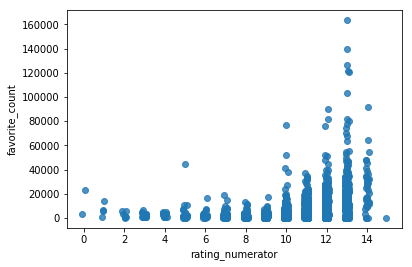

In [90]:
#plt.scatter(data=tweet_master, x='rating_numerator', y='favorite_count')


Text(0,0.5,'# retweets')

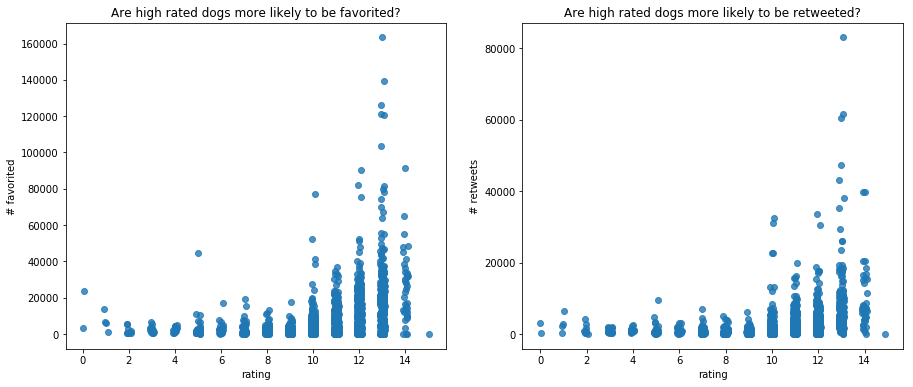

In [95]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.regplot(data=tweet_master, x='rating_numerator', y='favorite_count', x_jitter=0.1, fit_reg=False)
plt.title('Are high rated dogs more likely to be favorited?')
plt.xlabel('rating')
plt.ylabel('# favorited')
plt.subplot(1,2,2)
sns.regplot(data=tweet_master, x='rating_numerator', y='retweet_count', x_jitter=0.1, fit_reg=False)
plt.title('Are high rated dogs more likely to be retweeted?')
plt.xlabel('rating')
plt.ylabel('# retweets')

<a id='conc'></a>
## Conclusions